In [1]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/faiz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('data/housing-data.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X=df[['sqft']].values
Y_true=df[['price']].values

In [6]:
X

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000],
       [1985],
       [1534],
       [1427],
       [1380],
       [1494],
       [1940],
       [2000],
       [1890],
       [4478],
       [1268],
       [2300],
       [1320],
       [1236],
       [2609],
       [3031],
       [1767],
       [1888],
       [1604],
       [1962],
       [3890],
       [1100],
       [1458],
       [2526],
       [2200],
       [2637],
       [1839],
       [1000],
       [2040],
       [3137],
       [1811],
       [1437],
       [1239],
       [2132],
       [4215],
       [2162],
       [1664],
       [2238],
       [2567],
       [1200],
       [ 852],
       [1852],
       [1203]])

In [5]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y_true,test_size=0.3)

In [9]:
len(X_train)

32

In [10]:
len(X_test)

15

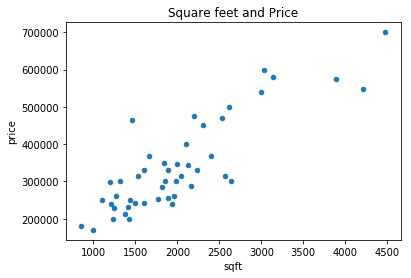

In [6]:
df.plot(kind='scatter',
       x='sqft',
       y='price', title='Square feet and Price')

In [7]:
model=Sequential()
model.add(Dense(1, input_shape=(1,)))

In [8]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [9]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 27ms/step - loss: 126709850112.0000
Epoch 2/10
32/32 [==============================] - 0s 146us/step - loss: 125553213440.0000
Epoch 3/10
32/32 [==============================] - 0s 109us/step - loss: 124402163712.0000
Epoch 4/10
32/32 [==============================] - 0s 79us/step - loss: 123256774656.0000
Epoch 5/10
32/32 [==============================] - 0s 163us/step - loss: 122117160960.0000
Epoch 6/10
32/32 [==============================] - 0s 165us/step - loss: 120983420928.0000
Epoch 7/10
32/32 [==============================] - 0s 228us/step - loss: 119855611904.0000
Epoch 8/10
32/32 [==============================] - 0s 61us/step - loss: 118733840384.0000
Epoch 9/10
32/32 [==============================] - 0s 79us/step - loss: 117618180096.0000
Epoch 10/10
32/32 [==============================] - 0s 66us/step - loss: 116508721152.0000


In [32]:
y_train_pred= model.predict(X_train).ravel()
y_test_pred=model.predict(X_test).ravel()

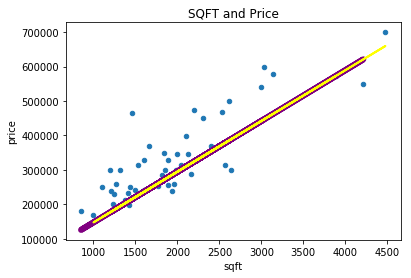

In [33]:
df.plot(kind='scatter',
       x='sqft',
       y='price', title='SQFT and Price')
plt.plot(X_train, y_train_pred, color='purple', linewidth=6)
plt.plot(X_test, y_test_pred, color='yellow', linewidth=2)

In [22]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [24]:
print(mse(Y_train, y_train_pred))
print(mse(Y_test, y_test_pred))

36413959976.44272
52620348069.25739


In [26]:
w,b=model.get_weights()

In [27]:
w

array([[76.11963]], dtype=float32)